DS1224 
Minor Project on Data Analysis and Machine Learning
By :- Sanket Salve 

installing and importing essential Python libraries.

In [117]:
!pip install pandas matplotlib seaborn scikit-learn

# Importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

Loading and Exploring the E-commerce dataset.

In [56]:
df=pd.read_csv("D:/PROJECTS/Processed_Ecommerce_Dataset.csv")
print(df)

              Platform  Delivery Time (Minutes)     Product Category  \
0              JioMart                       37            Beverages   
1              JioMart                       38               Snacks   
2     Swiggy Instamart                       25              Grocery   
3              JioMart                       27  Fruits & Vegetables   
4              Blinkit                       51        Personal Care   
...                ...                      ...                  ...   
9995           JioMart                       33                Dairy   
9996  Swiggy Instamart                       38        Personal Care   
9997  Swiggy Instamart                       29                Dairy   
9998           JioMart                       31        Personal Care   
9999           JioMart                       35              Grocery   

      Order Value (INR)                           Customer Feedback  \
0                   282                      Good quality produc

In [57]:
print(df.head(5))

           Platform  Delivery Time (Minutes)     Product Category  \
0           JioMart                       37            Beverages   
1           JioMart                       38               Snacks   
2  Swiggy Instamart                       25              Grocery   
3           JioMart                       27  Fruits & Vegetables   
4           Blinkit                       51        Personal Care   

   Order Value (INR)                           Customer Feedback  \
0                282                      Good quality products.   
1                113  Horrible experience, never ordering again.   
2                273                      Good quality products.   
3                333                    Easy to order, loved it!   
4               1707              Very late delivery, not happy.   

   Service Rating Delivery Delay Refund Requested  
0               4             No               No  
1               1             No              Yes  
2               4   

Info of the Dataset 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Platform                 10000 non-null  object
 1   Delivery Time (Minutes)  10000 non-null  int64 
 2   Product Category         10000 non-null  object
 3   Order Value (INR)        10000 non-null  int64 
 4   Customer Feedback        10000 non-null  object
 5   Service Rating           10000 non-null  int64 
 6   Delivery Delay           10000 non-null  object
 7   Refund Requested         10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


Handling Missing Values

In [67]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with mode 
df.fillna(df.mode().iloc[0], inplace=True)

Platform                   0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64


In [69]:
# Verify no missing values
print(df.isnull().sum())

Platform                   0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64


In [71]:
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,10000.000000,10000.000000,10000.000000
mean,29.475400,597.971100,3.250400
std,9.954532,421.841185,1.581376
min,5.000000,50.000000,1.000000
25%,23.000000,286.000000,2.000000
50%,29.000000,483.000000,3.000000
75%,36.000000,781.000000,5.000000
max,71.000000,1998.000000,5.000000


Basic Stats of the Data

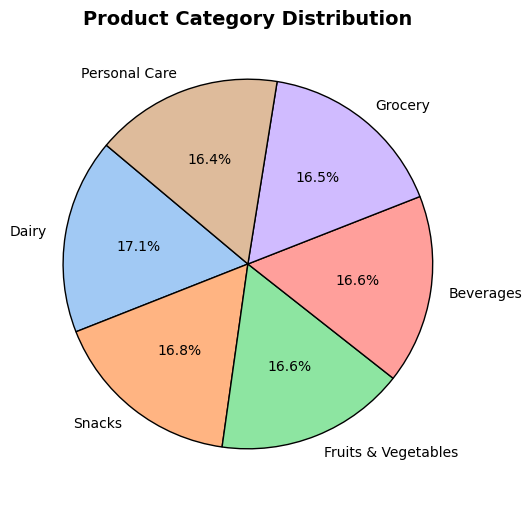

In [73]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel")
df["Product Category"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=colors,  
    startangle=140,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1} 
)
plt.title("Product Category Distribution", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.show()


Interpretation:
The Product Category Distribution pie chart shows that Most order category has the highest share, indicating strong customer demand whereas Least Ordered Category has the lowest share, suggesting lower preference or availability. 
Businesses can focus on high-demand categories for better stock management and improve marketing for low-demand categories to boost sales.

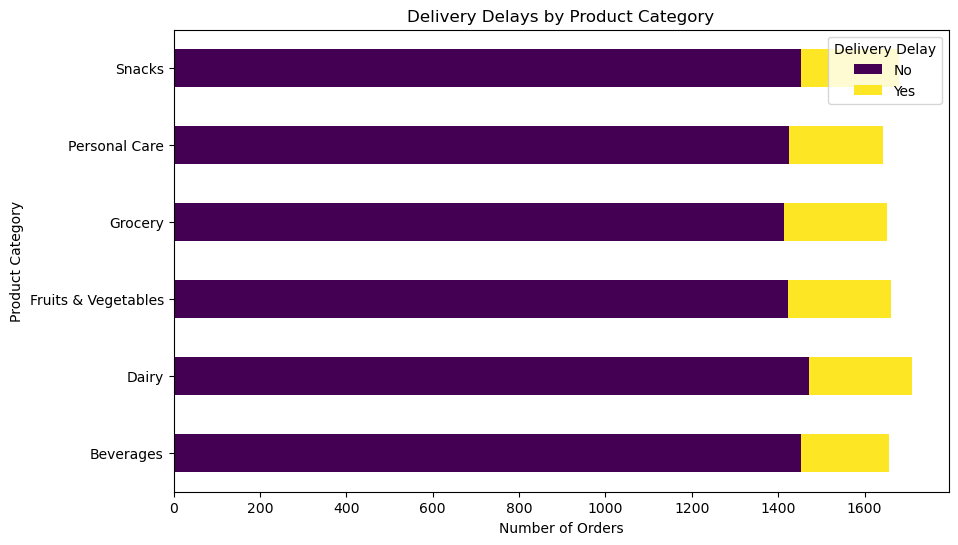

In [75]:
pd.crosstab(df["Product Category"], df["Delivery Delay"]).plot(
    kind="barh", stacked=True, figsize=(10, 6), colormap="viridis"
)
plt.title("Delivery Delays by Product Category")
plt.ylabel("Product Category")
plt.xlabel("Number of Orders")
plt.legend(title="Delivery Delay")
plt.show()


Interpretation:
The Horizontal Stacked Bar Chart shows how delivery delays vary across product categories. Category with Most Delays has the highest number of delayed orders, suggesting possible supply chain or logistics issues. Category with Least Delays experiences fewer delays, indicating efficient delivery management. Businesses can focus on improving logistics for high-delay categories to enhance customer satisfaction.

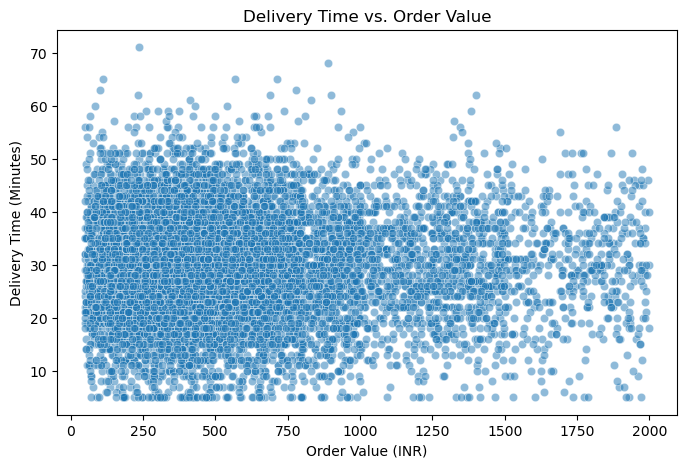

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Order Value (INR)', y='Delivery Time (Minutes)', alpha=0.5)
plt.title('Delivery Time vs. Order Value')
plt.xlabel('Order Value (INR)')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

Interpretation:
The scatter plot visualizes the relationship between Order Value and Delivery Time. We can see that there is a strong correlation in Delivery Time and Order Value.We can also see that higher order values generally lead to longer delivery times and most orders fall within a common price and delivery time range.Understanding this trend can help businesses optimize delivery efficiency and pricing strategies.


C:\Users\sanketsalve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


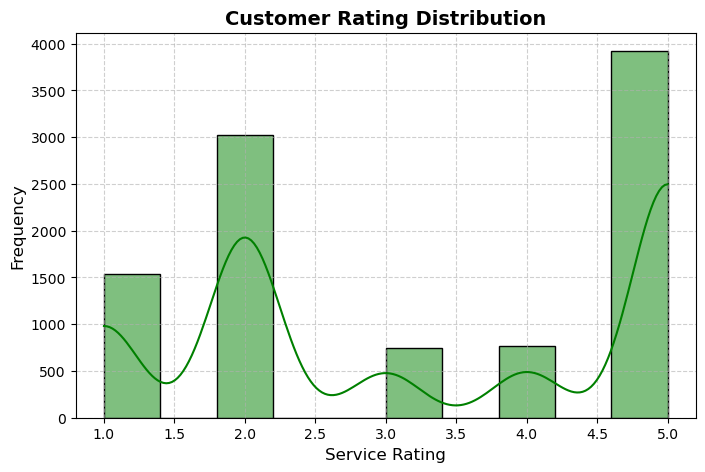

In [79]:
plt.figure(figsize=(8,5))
sns.histplot(df['Service Rating'], bins=10, kde=True, color='green')
plt.title('Customer Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Service Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Interpretation:
The customer ratings histogram helps analyze the overall service quality and customer satisfaction. If most ratings are high (e.g. 4-5 stars), it indicates strong customer approval and a positive service experience. A left-skewed distribution (more low ratings) suggests frequent dissatisfaction, possibly due to delivery delays or poor product quality. If ratings are spread out evenly, it implies mixed customer experiences, meaning some aspects of the service may need improvement. Identifying the key factors influencing lower ratings can help enhance customer satisfaction and improve business performance.

Training and testing models in the data 

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [82]:
print(df.dtypes)

Platform                   object
Delivery Time (Minutes)     int64
Product Category           object
Order Value (INR)           int64
Customer Feedback          object
Service Rating              int64
Delivery Delay             object
Refund Requested           object
dtype: object


In [85]:
label_encoders = {}
for col in ['Platform', 'Product Category', 'Delivery Delay', 'Refund Requested']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [87]:
X_refund = df[['Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating']]
y_refund = df['Refund Requested']
X_train_refund, X_test_refund, y_train_refund, y_test_refund = train_test_split(X_refund, y_refund, test_size=0.2, random_state=42)

In [89]:
X_delay = df[['Platform', 'Product Category', 'Order Value (INR)']]
y_delay = df['Delivery Delay']
X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(X_delay, y_delay, test_size=0.2, random_state=42)


In [91]:
X_delivery_time = df[['Platform', 'Product Category', 'Order Value (INR)']]
y_delivery_time = df['Delivery Time (Minutes)']
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_delivery_time, y_delivery_time, test_size=0.2, random_state=42)


In [93]:
# Logistic Regression (Refund Prediction)
log_reg = LogisticRegression()
log_reg.fit(X_train_refund, y_train_refund)
y_pred_log = log_reg.predict(X_test_refund)
print("Logistic Regression Accuracy:", accuracy_score(y_test_refund, y_pred_log))


Logistic Regression Accuracy: 1.0


Logistic Regression (Refund Prediction)

This model predicts whether a refund will be requested based on delivery time, order value, and service rating.
Logistic regression works well for binary classification problems like this one.
The accuracy score tells us how well the model distinguishes between refund requests and non-requests.
If accuracy is low, it may indicate that other factors influence refunds beyond the selected features.

In [95]:
# Decision Tree (Delivery Delay Classification)
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_delay, y_train_delay)
y_pred_dt = dt.predict(X_test_delay)
print("Decision Tree Accuracy:", accuracy_score(y_test_delay, y_pred_dt))

Decision Tree Accuracy: 0.8505


Decision Tree (Delivery Delay Classification)

This model classifies whether an order will be delayed based on platform, product category, and order value.
Decision trees are useful for capturing non-linear relationships and providing an easy-to-interpret model.
The tree visualization helps understand which features play a crucial role in predicting delays.
Overfitting can be an issue, so controlling max_depth helps balance accuracy and generalization.

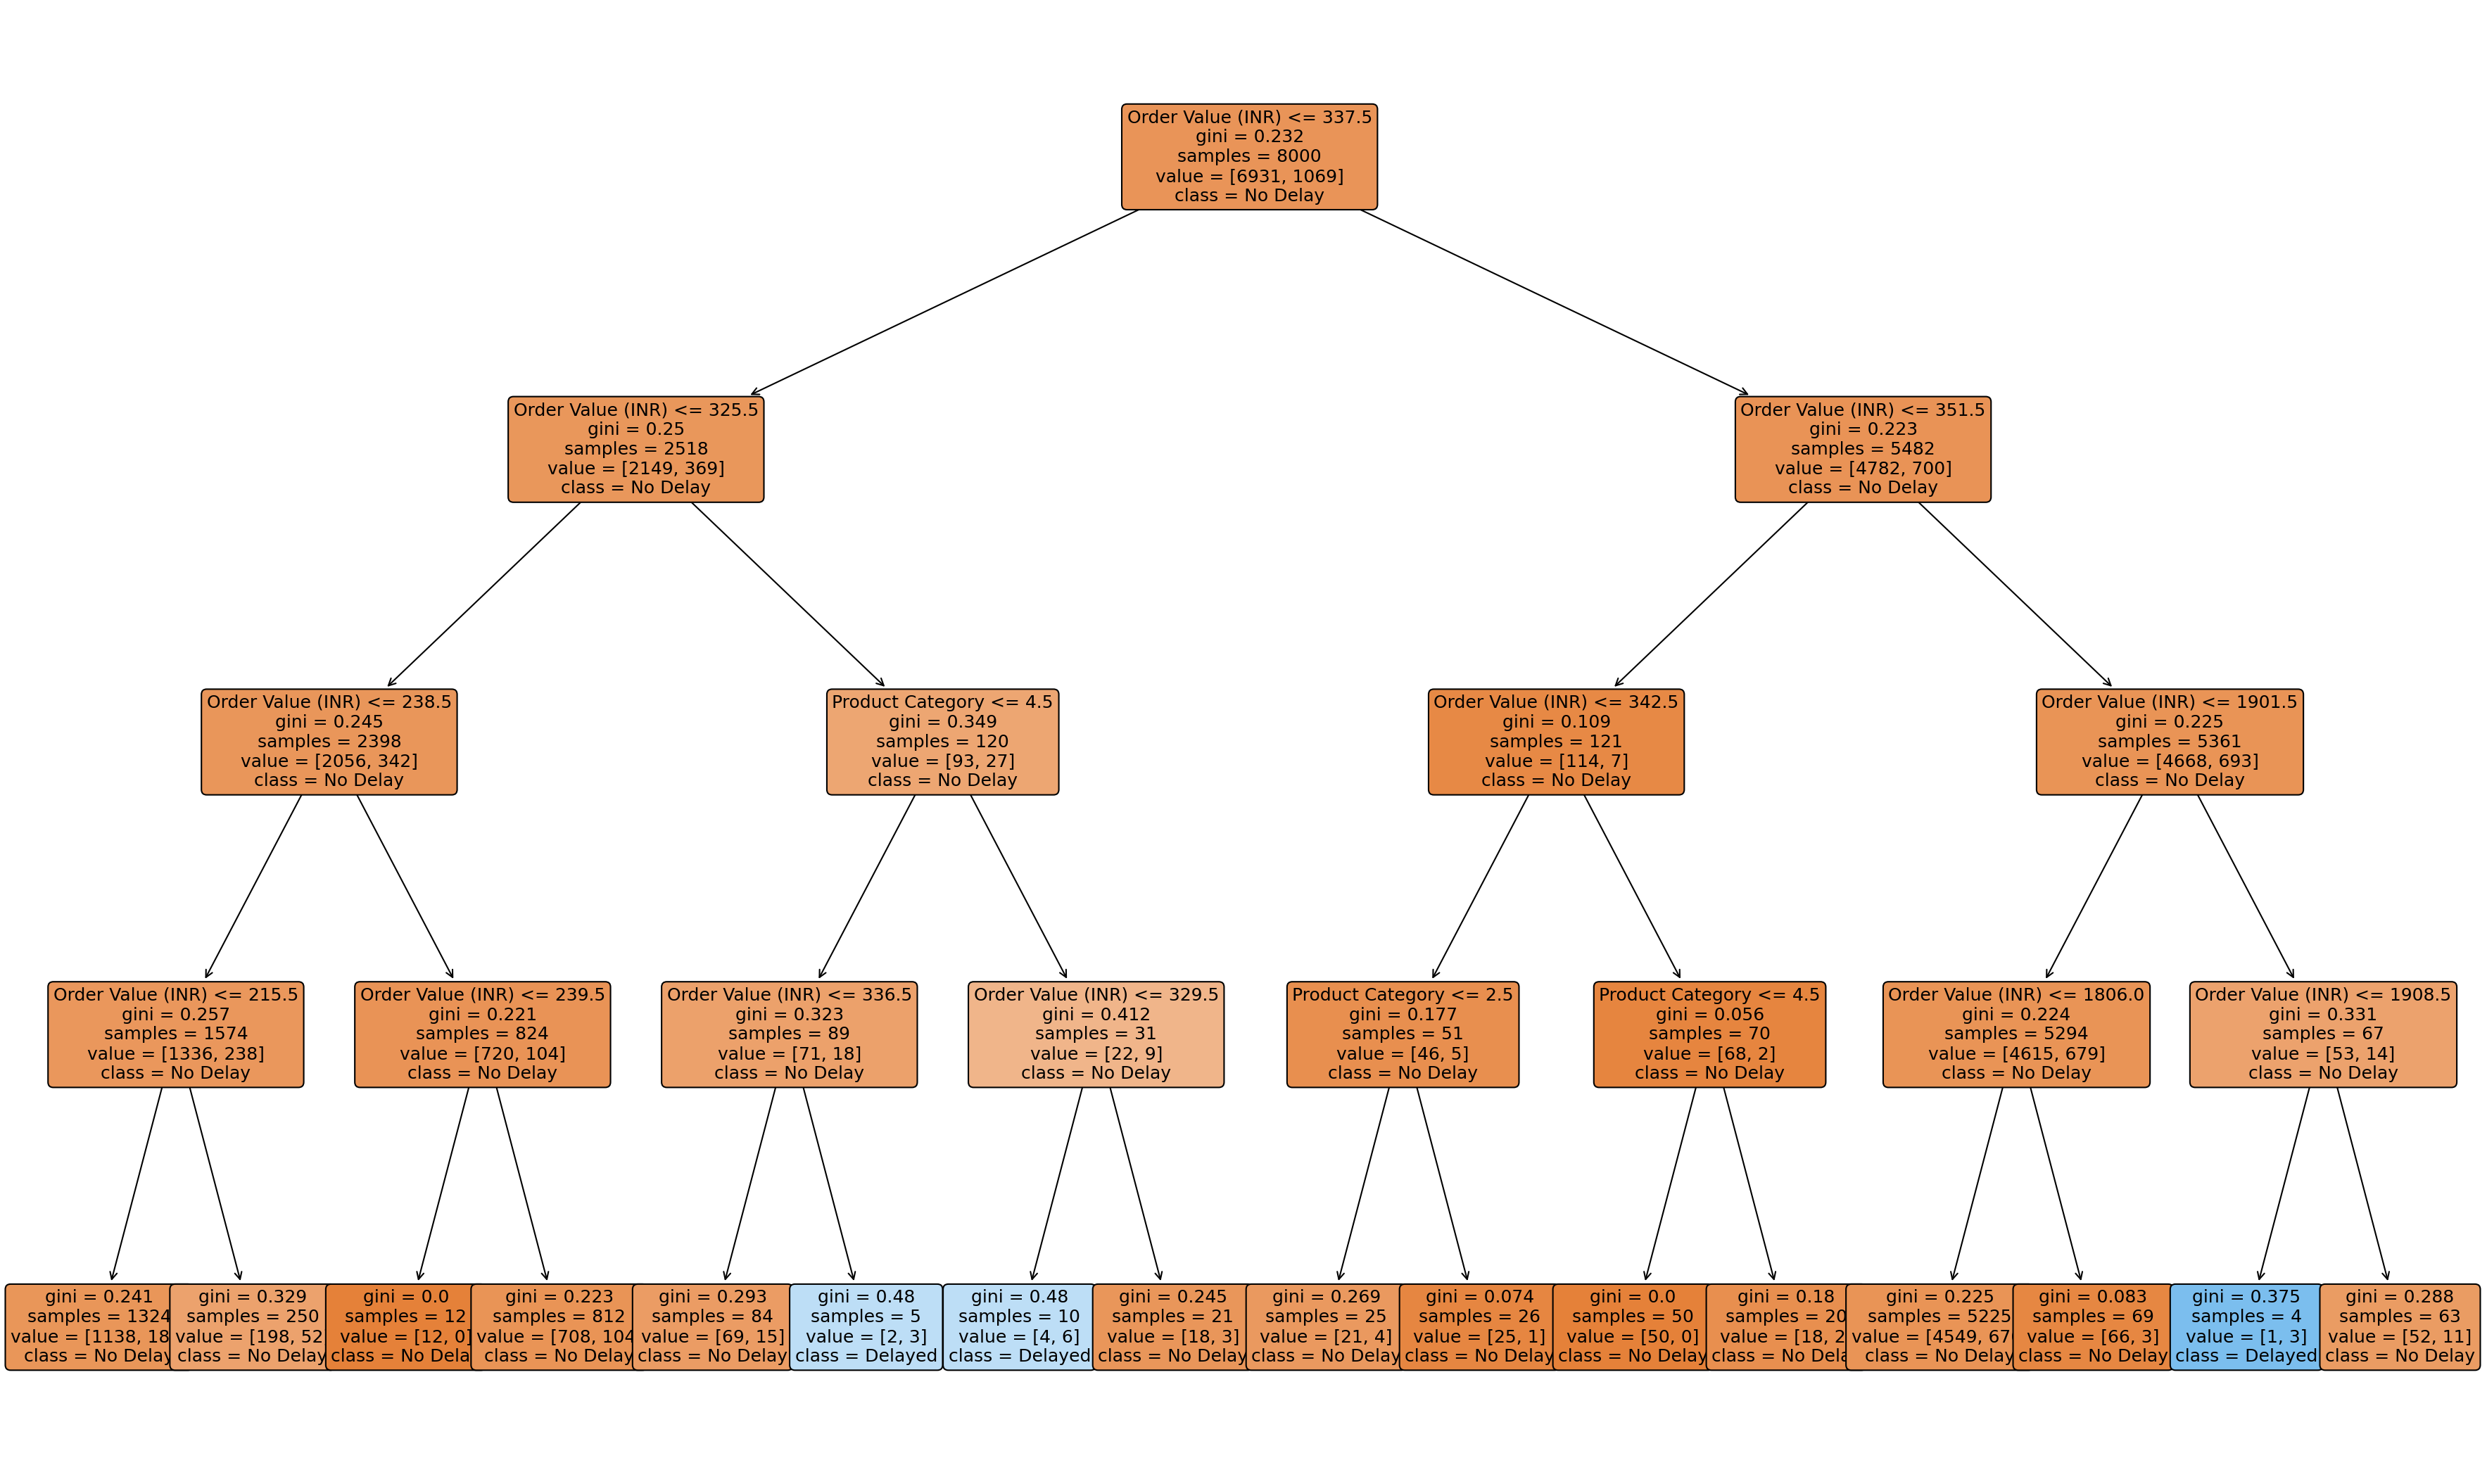

In [123]:
# Visualizing Decision Tree
plt.figure(figsize=(30, 18), dpi=150)
plot_tree(dt, feature_names=X_delay.columns, class_names=['No Delay', 'Delayed'], filled=True, rounded=True, fontsize=12)
plt.show()

In [99]:
# Random Forest (Refund Prediction)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_refund, y_train_refund)
y_pred_rf = rf.predict(X_test_refund)
print("Random Forest Accuracy:", accuracy_score(y_test_refund, y_pred_rf))

Random Forest Accuracy: 1.0


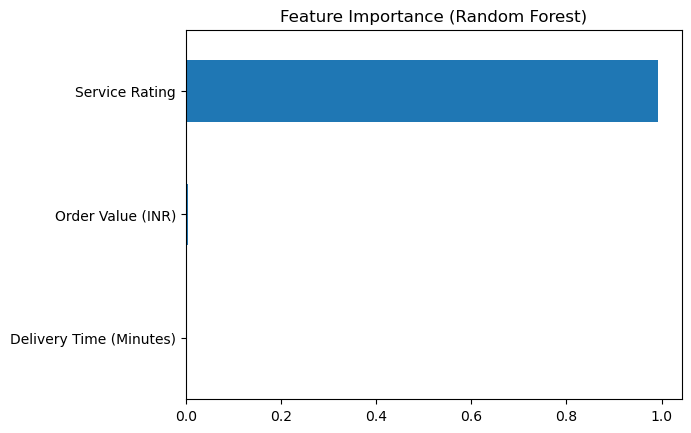

In [101]:
#Visualizing the Random Forest 
feature_importances = pd.Series(rf.feature_importances_, index=X_refund.columns)
feature_importances.sort_values().plot(kind='barh', title='Feature Importance (Random Forest)')
plt.show()

Random Forest (Refund Prediction)

This ensemble model improves upon decision trees by averaging multiple trees, reducing overfitting.
It provides feature importance scores, showing which variables most influence refund requests.
If the model performs significantly better than logistic regression, it suggests non-linearity in refund patterns.
However, interpretability is lower than a single decision tree since it relies on multiple trees.

In [119]:
# Linear Regression (Delivery Time Prediction)
lr = LinearRegression()
lr.fit(X_train_time, y_train_time)
y_pred_lr = lr.predict(X_test_time)
print("Linear Regression MSE:", mean_squared_error(y_test_time, y_pred_lr))

Linear Regression MSE: 102.39681627134411


Linear Regression (Delivery Time Prediction)

This model predicts delivery time based on platform, product category, and order value.
A lower Mean Squared Error (MSE) indicates better predictive performance.
If MSE is high, it may suggest missing important variables or non-linear relationships.
Checking residual plots can help determine if the linear assumption holds for this dataset.